In [50]:
import folium
import json

In [51]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

geo_Data = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

In [52]:
dfun = pd.read_csv('https://gist.githubusercontent.com/str4t3gos/d089dd9bab5d075a4c39e48da301b374/raw/653feea057e6b7aa54ee772922e696e7f7d1ba61/country_un2.csv')
dfun.head()

COUNTRY  YEAR  VALUE
0  Greece  1974    2.4
1  Greece  1975    3.0
2  Greece  1976    2.3
3  Greece  1977    2.1
4  Greece  1978    2.3

In [74]:
dfun17 = dfun[dfun['YEAR'] == 2017]
dfun17.head()



COUNTRY  YEAR  VALUE
43      Greece  2017   21.5
44     Albenia  2017   13.7
48     Austria  2017    5.5
50  Azerbaijan  2017    0.8
52     Belgium  2017    7.1

In [73]:
dfun10 = dfun[dfun['YEAR'] == 2010]
dfun10.head()

COUNTRY  YEAR  VALUE
36      Greece  2010   12.7
45     Albenia  2010   14.9
46     Armenia  2010    6.9
47     Austria  2010    4.8
49  Azerbaijan  2010    0.9

In [78]:


sf_map= folium.Map([40., 10.], zoom_start=4)

sf_map.choropleth(
    geo_data=geo_Data,
    name='choropleth',
    data=dfun17,
    columns=['COUNTRY','VALUE'],
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.name',
    legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(sf_map)
sf_map


#sf_map.save('europe17.html')



In [79]:

sf_map10= folium.Map([40., 10.], zoom_start=4)

sf_map10.choropleth(
    geo_data=geo_Data,
    name='choropleth',
    data=dfun10,
    columns=['COUNTRY','VALUE'],
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.name',
    legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(sf_map10)
sf_map10



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


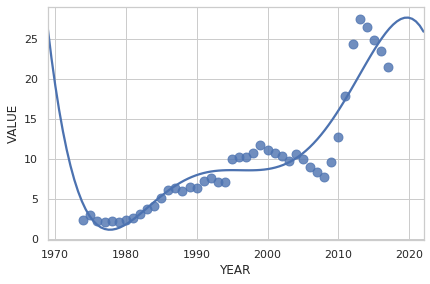

In [123]:
dgreece = dfun[dfun['COUNTRY'] == 'Greece']

dgreecefinal = dgreece[['YEAR','VALUE']]

import seaborn as sns

ax = sns.regplot(x="YEAR", y="VALUE", data=dgreecefinal,
                 scatter_kws={"s": 80},
                 order=6, ci=None)





In [132]:

dgreecefinal10years = dgreecefinal[dgreecefinal['YEAR'] >=2007]
dgreecefinal10years.head()

YEAR  VALUE
33  2007    8.4
34  2008    7.8
35  2009    9.6
36  2010   12.7
37  2011   17.9

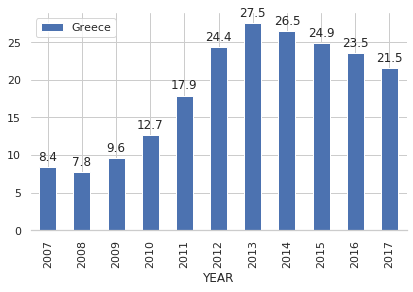

In [220]:
%matplotlib inline

ax=dgreecefinal10years.plot.bar('YEAR','VALUE')
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12
               )

ax.legend(['Greece'],loc='upper left')
plt.show()
